In [6]:
%%capture
!pip install -U sagemaker

In [7]:
%%capture
!pip install "sagemaker>=2.69.0" "transformers==4.12.3" --upgrade
!pip install  "datasets==1.13" --upgrade

In [4]:
%%capture
!pip install s3fs==0.4.2 -U -q

### Load dataset and have a peak:

This cell is required in SageMaker Studio, otherwise the download of the dataset will throw an error.
After running this cell, the kernel needs to be restarted. After restarting tthe kernel, continue with the cell below (loading the dataset)

In [1]:
# %%capture
# import IPython
# !conda install -c conda-forge ipywidgets -y
# IPython.Application.instance().kernel.do_shutdown(True)

In [1]:
from datasets import load_dataset
import pandas as pd

In [2]:
import time

start = time.time()

dataset = load_dataset("emotion")

end = time.time()

print(end - start)

Using custom data configuration default
Reusing dataset emotion (/home/ec2-user/.cache/huggingface/datasets/emotion/default/0.0.0/6e4212efe64fd33728549b8f0435c73081391d543b596a05936857df98acb681)


1.1265473365783691


In [8]:
dataset 

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [30]:
# load dataset
train_dataset, validation_dataset, test_dataset = load_dataset('emotion', split=['train','validation','test'])

Using custom data configuration default
Reusing dataset emotion (/home/ec2-user/.cache/huggingface/datasets/emotion/default/0.0.0/6e4212efe64fd33728549b8f0435c73081391d543b596a05936857df98acb681)


In [31]:
train_dataset.shape

(16000, 2)

In [32]:
validation_dataset.shape

(2000, 2)

In [33]:
test_dataset.shape

(2000, 2)

In [34]:
test_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [5]:
import random
import pandas as pd
from IPython.display import display, HTML

def display_random_examples(dataset, num_examples=5):
    assert num_examples < len(dataset)
    
    random_picks = []
    for i in range(num_examples):
        random_pick = random.randint(0,len(dataset)-1)
        random_picks.append(random_pick)
    
    df = pd.DataFrame(dataset[random_picks])
    display(HTML(df.to_html()))
        

In [9]:
display_random_examples(dataset['train'], 5)

,label,text
0,3,i feel like there are people out there on the internet that have issues with my online friends and then expect me to be hateful or mean to them as well
1,0,i were both feeling homesick so we decided to venture to a relatively new part of town
2,0,i think this would be fantastic as i feel the over nutrition of children is suffering and that over of all children are obese
3,1,i feel pleasantly mellow regardless
4,3,i feel i am with ampatuan and joining the forces of hell bitchy human who only wants is to spread their worst odor in this world


In [11]:
df = dataset['train'].to_pandas()

In [24]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth',150,'display.max_columns',50):
              display(df.head(10))

,label,text
0,0,i didnt feel humiliated
1,0,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
2,3,im grabbing a minute to post i feel greedy wrong
3,2,i am ever feeling nostalgic about the fireplace i will know that it is still on the property
4,3,i am feeling grouchy
5,0,ive been feeling a little burdened lately wasnt sure why that was
6,5,ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
7,4,i feel as confused about life as a teenager or as jaded as a year old man
8,1,i have been with petronas for years i feel that petronas has performed well and made a huge profit
9,2,i feel romantic too


In [38]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth',150,'display.max_columns',50):
              display(df.tail(10))

,label,text
15990,1,i feel really glad that i dont look like the celebrities out there that are so beautiful she told dr
15991,0,i have wanted to perhaps convey my feelings of a matter instead of my thoughts and have rejected it because i have thought feelings in the matter ...
15992,3,i moved away he said something that made me feel violent but its something i still cant make out
15993,1,i most days feel like if braeden and calvin are happy then it has been a successful day
15994,2,i feel so sympathetic empathetic towards them
15995,0,i just had a very brief time in the beanbag and i said to anna that i feel like i have been beaten up
15996,0,i am now turning and i feel pathetic that i am still waiting tables and subbing with a teaching degree
15997,1,i feel strong and good overall
15998,3,i feel like this was such a rude comment and im glad that t
15999,0,i know a lot but i feel so stupid because i can not portray it


In [15]:
df['label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

In [26]:
df.shape

(16000, 2)

In [25]:
import numpy as np
    
# split the dataset into train, val, and test
train, val, test = np.split(df.sample(frac=1), [int(0.7*len(df)), int((0.7+0.15)*len(df))])

In [27]:
train.shape

(11200, 2)

In [28]:
val.shape

(2400, 2)

In [29]:
test.shape

(2400, 2)

Matplotlib is building the font cache; this may take a moment.


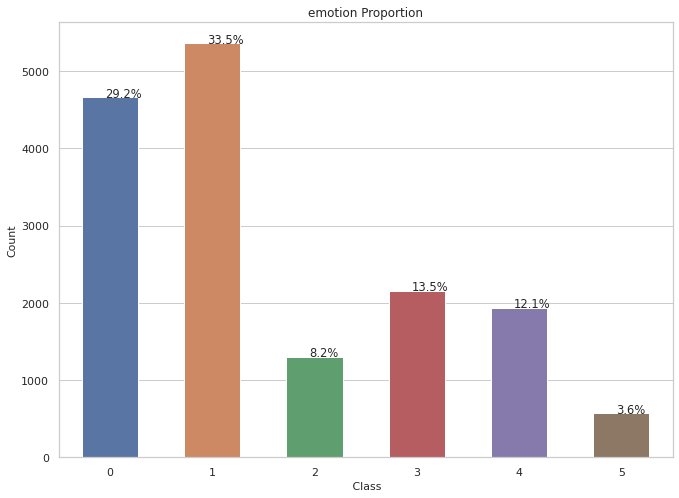

In [13]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(11,8))

color_labels = df['label'].unique()

# List of color palette to use
rgb_values = sns.color_palette("tab10", 2)

# Map label to color palette

color_map = dict(zip(color_labels, rgb_values))


ax = sns.countplot(x="label", data=df)

plt.xticks(size=11)
plt.xlabel(' Class', size=  11)
plt.yticks(size=11)
plt.ylabel('Count', size=  11)

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 11.5)
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .55)

without_hue(ax, df.label)
plt.title('emotion Proportion')
plt.show()

In [4]:
from datasets import list_datasets, load_dataset
from pprint import pprint

datasets_list = list_datasets() 


In [5]:
pprint(datasets_list,compact=True) 

['0n1xus/codexglue', 'AConsApart/anime_subtitles_DialoGPT',
 'AI-Sweden/SuperLim', 'ARKseal/YFCC14M_subset_webdataset', 'ARTeLab/fanpage',
 'Abdo1Kamr/Arabic_Hadith', 'AdWeeb/DravidianMT', 'Adnan/Urdu_News_Headlines',
 'Akshith/aa', 'Akshith/g_rock', 'Akshith/test',
 'AlekseyDorkin/extended_tweet_emojis', 'Alvenir/nst-da-16khz',
 'Annielytics/DoctorsNotes',
 'AryanLala/autonlp-data-Scientific_Title_Generator', 'Avishekavi/Avi',
 'BSC-TeMU/SQAC', 'BSC-TeMU/ancora-ca-ner', 'BSC-TeMU/sts-ca', 'BSC-TeMU/tecla',
 'BSC-TeMU/viquiquad', 'BSC-TeMU/xquad-ca', 'Babelscape/rebel-dataset',
 'Binbin/my_dataset', 'BlakesOrb6/Fred-Flintstone', 'Bosio/pacman',
 'Bosio/pacman_descriptions', 'CAGER/rick', 'CShorten/KerasBERT',
 'CShorten/ZillowPrize', 'ChadxxxxHall/Inter-vision',
 'Champion/vpc2020_clear_anon_speech', 'Check/a_re_gi', 'Check/region_1',
 'Check/region_2', 'Check/region_3', 'Check/region_4', 'Check/region_5',
 'Check/region_6', 'Check/region_7', 'Check/region_8', 'Check/region_9',
 'Check

### Initialise Sagemaker variables and create S3 bucket

In [16]:
from sagemaker.huggingface.processing import HuggingFaceProcessor
import sagemaker
from sagemaker import get_execution_role

In [17]:
sess = sagemaker.Session()
role = sagemaker.get_execution_role()

In [18]:
sess

In [19]:
role 

'arn:aws:iam::197614225699:role/bi-sagemaker-access'

In [20]:
sess.account_id()

'197614225699'

In [21]:
bucket = f"emotion-class-{sess.account_id()}"
sess._create_s3_bucket_if_it_does_not_exist(bucket_name=bucket, region=sess._region_name)

In [55]:
bucket 

'emotion-class-197614225699'

### Save the name of the S3 bucket for later sessions

In [36]:
%store bucket

Stored 'bucket' (str)


### Set up processing job

In [59]:
hf_processor = HuggingFaceProcessor(
    role=role,
    instance_type="ml.p2.xlarge",
    transformers_version='4.6',
    base_job_name="emotion-class",
    pytorch_version='1.7',
    instance_count=1,
)

In [60]:
from sagemaker.processing import ProcessingInput, ProcessingOutput

outputs=[
        ProcessingOutput(output_name="train_data", source="/opt/ml/processing/training", destination=f"s3://{bucket}/processing_output/train_data"),
        ProcessingOutput(output_name="validation_data", source="/opt/ml/processing/validation", destination=f"s3://{bucket}/processing_output/validation_data"),
        ProcessingOutput(output_name="test_data", source="/opt/ml/processing/test", destination=f"s3://{bucket}/processing_output/test_data"),
    ]
arguments = ["--dataset-name", "emotion",
             "--model-name", "roberta-base",
            "--batch-size", "500",]

In [61]:
hf_processor.run(
    code="scripts/preprocess.py",
    outputs=outputs,
    arguments=arguments
)


Job Name:  emotion-class-2021-12-01-21-37-25-005
Inputs:  [{'InputName': 'code', 'AppManaged': False, 'S3Input': {'S3Uri': 's3://sagemaker-us-east-1-197614225699/emotion-class-2021-12-01-21-37-25-005/source/sourcedir.tar.gz', 'LocalPath': '/opt/ml/processing/input/code/', 'S3DataType': 'S3Prefix', 'S3InputMode': 'File', 'S3DataDistributionType': 'FullyReplicated', 'S3CompressionType': 'None'}}, {'InputName': 'entrypoint', 'AppManaged': False, 'S3Input': {'S3Uri': 's3://sagemaker-us-east-1-197614225699/emotion-class-2021-12-01-21-37-25-005/source/runproc.sh', 'LocalPath': '/opt/ml/processing/input/entrypoint', 'S3DataType': 'S3Prefix', 'S3InputMode': 'File', 'S3DataDistributionType': 'FullyReplicated', 'S3CompressionType': 'None'}}]
Outputs:  [{'OutputName': 'train_data', 'AppManaged': False, 'S3Output': {'S3Uri': 's3://emotion-class-197614225699/processing_output/train_data', 'LocalPath': '/opt/ml/processing/training', 'S3UploadMode': 'EndOfJob'}}, {'OutputName': 'validation_data', 'A

In [62]:
preprocessing_job_description = hf_processor.jobs[-1].describe()

output_config = preprocessing_job_description['ProcessingOutputConfig']
for output in output_config['Outputs']:
    print(output['S3Output']['S3Uri'])

s3://emotion-class-197614225699/processing_output/train_data
s3://emotion-class-197614225699/processing_output/validation_data
s3://emotion-class-197614225699/processing_output/test_data


In [63]:
### quick inspect

In [64]:
import botocore
from datasets.filesystems import S3FileSystem
from datasets import load_from_disk

s3_session = botocore.session.Session()
s3 = S3FileSystem(session=s3_session)
dataset = load_from_disk(f's3://{bucket}/processing_output/train_data/', fs=s3)

In [65]:
df_train = pd.DataFrame(dataset)

In [66]:
df_train.head(10)

,attention_mask,input_ids,label,text
0,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 118, 46405, 619, 32386, 2, 1, 1, 1, 1, 1, ...",0,i didnt feel humiliated
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 118, 64, 213, 31, 2157, 98, 24418, 7, 98, ...",0,i can go from feeling so hopeless to so damned...
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[0, 757, 16004, 10, 2289, 7, 618, 939, 619, 34...",3,im grabbing a minute to post i feel greedy wrong
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 118, 524, 655, 2157, 28055, 59, 5, 24672, ...",2,i am ever feeling nostalgic about the fireplac...
4,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 118, 524, 2157, 22970, 17414, 2, 1, 1, 1, ...",3,i am feeling grouchy
5,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 2088, 57, 2157, 10, 410, 32875, 4490, 1205...",0,ive been feeling a little burdened lately wasn...
6,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 2088, 57, 602, 50, 7259, 1023, 27809, 50, ...",5,ive been taking or milligrams or times recomme...
7,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 118, 619, 25, 10985, 59, 301, 25, 10, 7044...",4,i feel as confused about life as a teenager or...
8,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 118, 33, 57, 19, 4716, 2839, 281, 13, 107,...",1,i have been with petronas for years i feel tha...
9,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 118, 619, 8728, 350, 2, 1, 1, 1, 1, 1, 1, ...",2,i feel romantic too
